# Assignment 2
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [1]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [2]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

### Load Dataset

In [5]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [6]:
# Loading the dataset
# eg.
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
# X.reshape((N,H*W*C))
# test = get_pca(X,50)

Dataset shape: (672, 32, 32, 3)


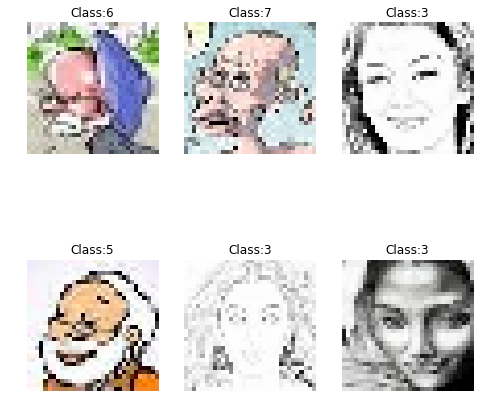

In [7]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [8]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [9]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    return X_k, pca

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [10]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    X_k = kpca.fit_transform(X)
    return X_k, kpca

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [11]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k, lda

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [12]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X,y)
    return X_k, klda

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [13]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [14]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

___________________________

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition.


1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [15]:
# Compute your features 
# eg.
# X_3D = get_kernel_lda(X,y,3)
def getScatter(dirpath):
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    X_3D,kpca = get_kernel_pca(X, 3)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)

IMFDB
Dataset shape: (400, 32, 32, 3)
IIIT-CFW
Dataset shape: (672, 32, 32, 3)
Yalse Faces
Dataset shape: (165, 32, 32, 3)


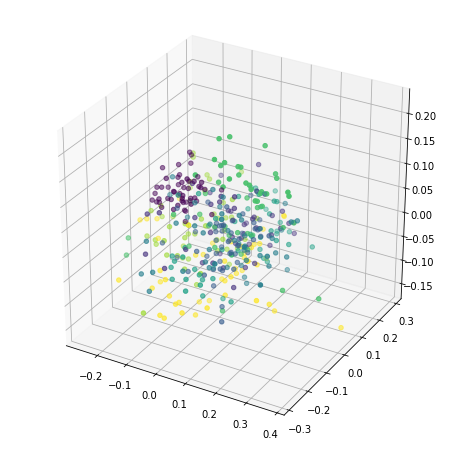

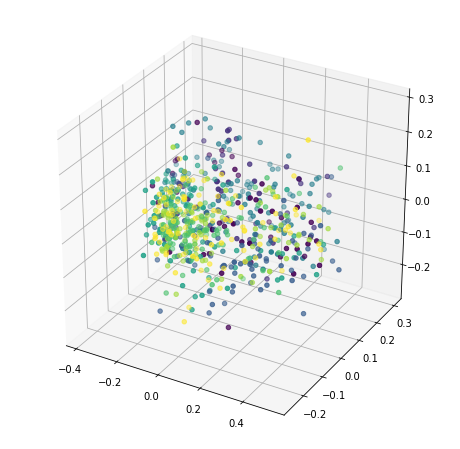

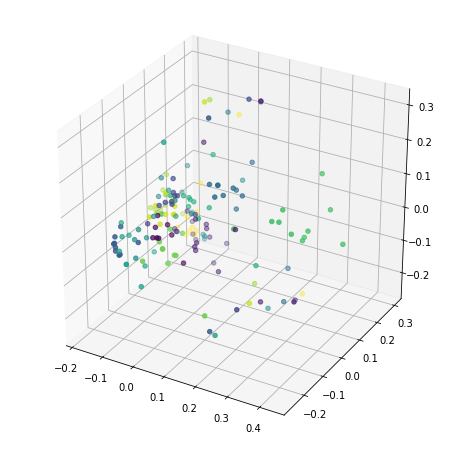

In [16]:
# Create a scatter plot  
# eg.
print("IMFDB")
getScatter('./dataset/IMFDB')
print("IIIT-CFW")
getScatter('./dataset/IIIT-CFW')
print("Yalse Faces")
getScatter('./dataset/Yale_face_database')


In [17]:
# Plot the eigen value spectrum 

def eig_spec(dirpath,title,comp):
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
#     comp = 150
    pca = PCA(n_components=comp)
    pca_orig = PCA()
    # print(pca)
    # print(type(pca))
    pca.fit(X)
    pca_orig.fit(X)
    # print(pca.singular_values_)
    print("For ",title)
    # plt.plot(pca.singular_values_)
    fig = plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.plot(pca.singular_values_)
    plt.title("No. of components: "+str(comp))
    plt.subplot(122)
    plt.plot(pca_orig.singular_values_)
    plt.title("original")
    plt.show()


# plt.plot(X_3D)

IMFDB
Dataset shape: (400, 32, 32, 3)
For  IMFDB


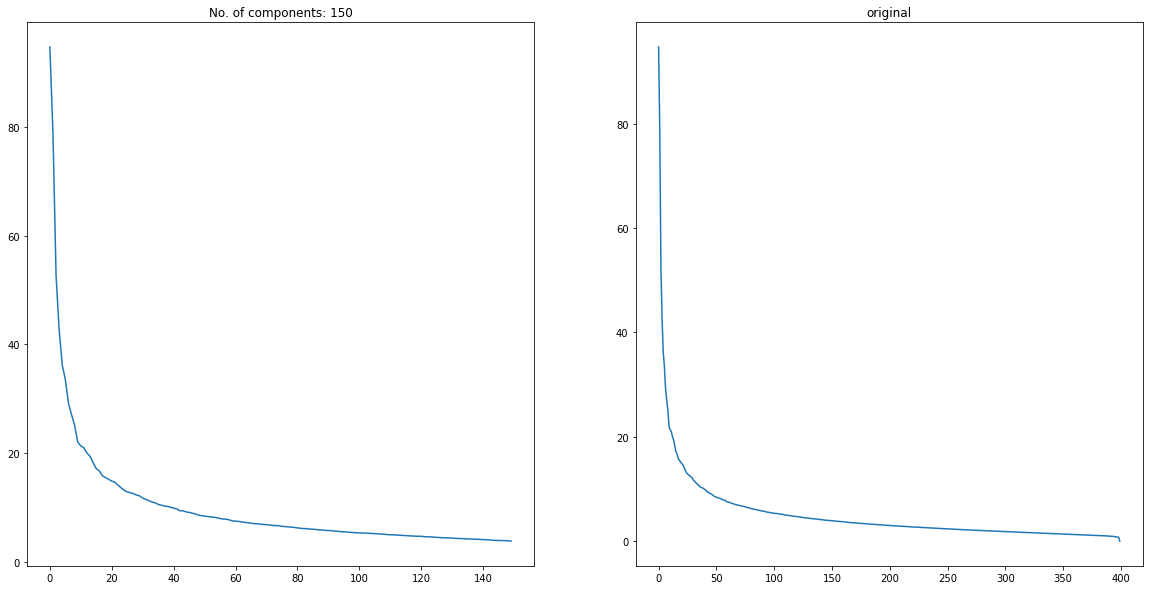

IIIT-CFW
Dataset shape: (672, 32, 32, 3)
For  IIIT-CFW


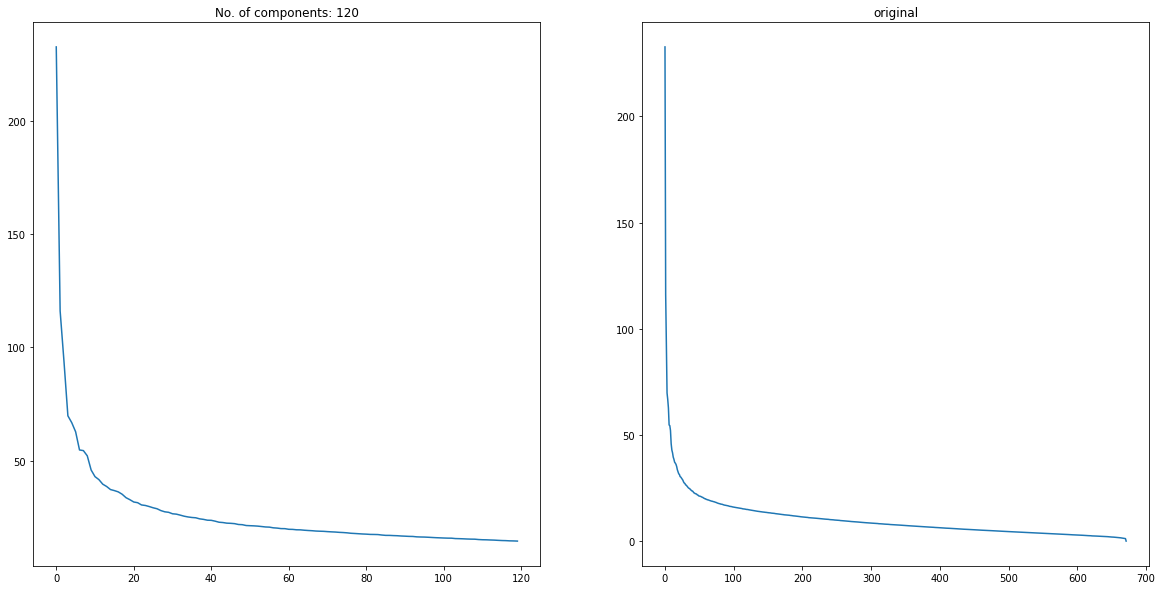

Yalse Faces
Dataset shape: (165, 32, 32, 3)
For  Yale Faces


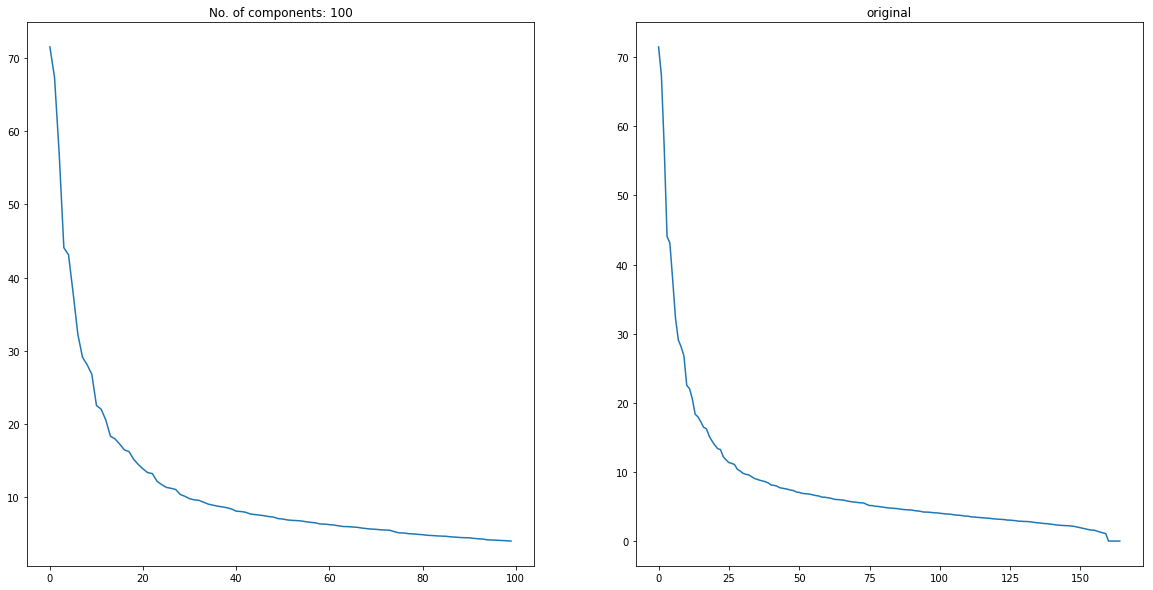

In [18]:
print("IMFDB")
eig_spec('./dataset/IMFDB',"IMFDB",150)
print("IIIT-CFW")
eig_spec('./dataset/IIIT-CFW',"IIIT-CFW",120)
print("Yalse Faces")
eig_spec('./dataset/Yale_face_database',"Yale Faces",100)

1(c). Reconstruct  the  image  back for each case


In [22]:
def reconstruct_images(X,comp,N,H,W,C):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
#     print(X.shape)
    X_3D,pca = get_pca(X, comp)
#     print(X_3D.shape)
#     print(X_reconstructed.shape)
    X_reconstructed = pca.inverse_transform(X_3D)
    
    reconstruct_X = np.reshape(X_reconstructed, (N,H,W,C))
#     pass
#     reconstruct_X = None
    
    return reconstruct_X    

In [23]:
# Display results 

def show_recon(dirpath,title,comp):
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    
    X_reconstructed = reconstruct_images(X,comp,N,H,W,C)

    # Display random images
    ind = np.random.randint(0,y.shape[0],6)
    print("For : ",title)
    disply_images(X_reconstructed[ind,...],y[ind],row=2,col=3)

    # Show the reconstruction error
    X_for_error =  np.reshape(X, (N,H,W,C))
    print("Error: ",np.sqrt(np.mean((X_for_error - X_reconstructed)**2)))

IMFDB
Dataset shape: (400, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For :  IMFDB


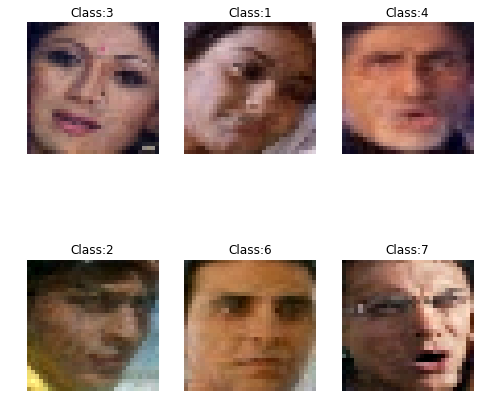

Error:  0.033301628959622534
IIIT-CFW
Dataset shape: (672, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For :  IIIT-CFW


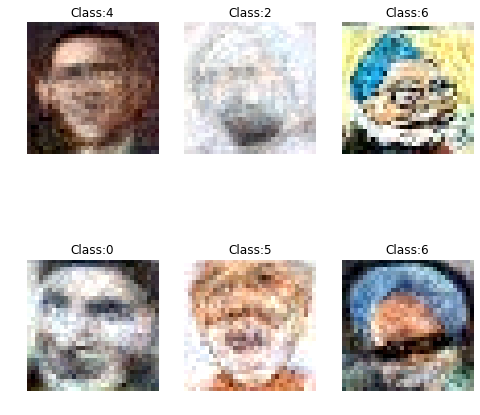

Error:  0.11631306018258532
Yale Faces
Dataset shape: (165, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For :  Yale Faces


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


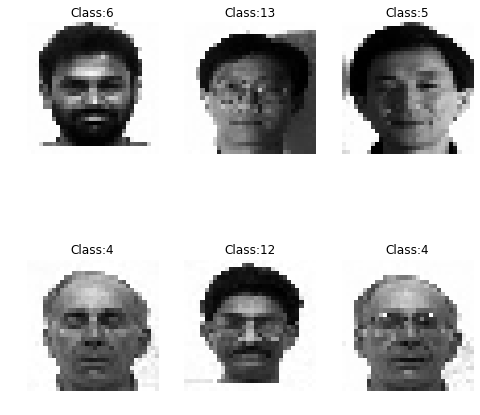

Error:  0.006915223350195953


In [24]:
print("IMFDB")
show_recon('./dataset/IMFDB',"IMFDB",150)
print("IIIT-CFW")
show_recon('./dataset/IIIT-CFW',"IIIT-CFW",150)
print("Yale Faces")
show_recon('./dataset/Yale_face_database',"Yale Faces",150)

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

In [27]:
# code goes here

# X_for_error =  np.reshape(X, (N,H,W,C))
#     print("Error: ",np.sqrt(np.mean((X_for_error - X_reconstructed)**2)))

def difficult_class(dirpath,title):
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    most_error = -5
    error = -5
    most_error_class = -1
    
    X_reconstructed = reconstruct_images(X,150,N,H,W,C)
    X_for_error =  np.reshape(X, (N,H,W,C))
    
    for cl in np.unique(y):
#         print(cl)
        d1 = X_reconstructed[np.where(y==cl)]
        d2 = X_for_error[np.where(y==cl)]
#         d1_for_error = d1.reshape(d1,(n,h,w,c))
        error = np.sqrt(np.mean((d1 - d2)**2))
        
        if(error > most_error):
            most_error = error
            most_error_class = cl
    
    print("For ",title," class with most error is ",most_error_class)
        

In [28]:
difficult_class('./dataset/IMFDB',"IMFDB")
difficult_class('./dataset/IIIT-CFW',"IIIT-CFW")
difficult_class('./dataset/Yale_face_database',"Yale faces")

Dataset shape: (400, 32, 32, 3)
For  IMFDB  class with most error is  2
Dataset shape: (672, 32, 32, 3)
For  IIIT-CFW  class with most error is  5
Dataset shape: (165, 32, 32, 3)
For  Yale faces  class with most error is  13


2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 


You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [29]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

class Classifier():
    def __init__(self,flag):
#         super.__init__()
        if flag == 'MLP':
            self.classifier = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
        if flag == 'LR':
            self.classifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
        if flag == 'SVM':
            self.classifier = SVC(gamma='auto')
        if flag == 'DT':
            self.classifier = DecisionTreeClassifier(random_state=0)
        
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.classifier.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return sklearn.metrics.confusion_matrix(y,pred)
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        a = self.classifier.fit(X_train,y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """

        # Create a confusion matrix
        y_pred = self.classifier.predict(X_validate)
        cm = confusion_matrix(y_pred, y_validate)
        
        # Calculate Validation accuracy 
        accuracy = cm.trace() / cm.sum()
    
        # Calculate precision and recall 
        prec,recall,_,_ =  precision_recall_fscore_support(y_validate, y_pred, average=None)
        
        # Calculate F1-score
        f1 = f1_score(y_validate, y_pred, average = 'weighted')
    
        return cm, accuracy, prec, recall, f1

In [280]:
# Create a train and validation split to train your classifier 
import pandas as pd
dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)

N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=27)
# print(X[:,0].shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

# x_train_proj = get_pca(x_train,dim)

Dataset shape: (165, 32, 32, 3)
(123, 3072) (123,) (42, 3072) (42,)


In [283]:
# # Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced x_train_proj.shape[1]ension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)

df3 = pd.DataFrame(columns = ['Feature','Dimension Space','Error','Accuracy','F1 Score'])
# x_train_proj.shape[1] = 50

#PCA + MLP
x_train_proj, pca= get_pca(x_train,123)
x_test_proj = pca.transform(x_test)
c = Classifier('MLP')
c.train(x_train_proj, y_train)
cm,a,p,r,f1 = c.validate(x_test_proj, y_test)
df3.loc[1] = ['PCA+MLP',x_train_proj.shape[1],1-a,a,f1]
# print(a)

#PCA + SVM
x_train_temp, pca= get_pca(x_train,123)
x_test_temp = pca.transform(x_test)
# print(x_train.shape)
x_train_proj, lda = get_lda(x_train_temp,y_train,100)
x_test_proj = lda.transform(x_test_temp)
# print(x_train_proj2.shape)
c = Classifier('SVM')
c.train(x_train_proj, y_train)
cm,a,p,r,f1 = c.validate(x_test_proj, y_test)
df3.loc[2] = ['PCA+LDA+SVM',x_train_proj.shape[1],1-a,a,f1]

#PCA + LDA + LR
x_train_temp, pca= get_pca(x_train,123)
x_test_temp = pca.transform(x_test)
# print(x_train.shape)
x_train_proj, lda = get_lda(x_train_temp,y_train,100)
x_test_proj = lda.transform(x_test_temp)
# print(x_train_proj2.shape)
c = Classifier('LR')
c.train(x_train_proj, y_train)
cm,a,p,r,f1 = c.validate(x_test_proj, y_test)
df3.loc[3] = ['PCA+LDA+LR',x_train_proj.shape[1],1-a,a,f1]

#KPCA + SVM
# x_train_proj, pca= get_kernel_pca(x_train,123)
# x_test_proj = pca.transform(x_test)
# c = Classifier('SVM')
# c.train(x_train_proj, y_train)
# cm,a,p,r,f1 = c.validate(x_test_proj, y_test)
# df3.loc[4] = ['KPCA+SVM',x_train_proj.shape[1],1-a,a,f1]

# #KPCA + DT
# x_train_proj, pca= get_kernel_pca(x_train,123)
# x_test_proj = pca.transform(x_test)
# c = Classifier('DT')
# c.train(x_train_proj, y_train)
# cm,a,p,r,f1 = c.validate(x_test_proj, y_test)
# df3.loc[5] = ['KPCA+DT',x_train_proj.shape[1],1-a,a,f1]

#LDA + LR
x_train_proj,lda = get_lda(x_train,y_train,100)
x_test_proj = lda.transform(x_test)
c = Classifier('LR')
c.train(x_train_proj, y_train)
cm,a,p,r,f1 = c.validate(x_test_proj, y_test)
df3.loc[6] = ['LDA+LR',x_train_proj.shape[1],1-a,a,f1]

#LDA + DT
x_train_proj,lda = get_lda(x_train,y_train,100)
x_test_proj = lda.transform(x_test)
c = Classifier('DT')
c.train(x_train_proj, y_train)
cm,a,p,r,f1 = c.validate(x_test_proj, y_test)
df3.loc[7] = ['LDA+DT',x_train_proj.shape[1],1-a,a,f1]

#KPCA + LDA + DT
# x_train_temp, kpca= get_kernel_pca(x_train,123)
# x_test_temp = kpca.transform(x_test)
# # print(x_train.shape)
# x_train_proj, lda = get_kernel_lda(x_train_temp,y_train,100)
# x_test_proj = lda.transform(x_test_temp)
# # print(x_train_proj2.shape)
# c = Classifier('LR')
# c.train(x_train_proj, y_train)
# cm,a,p,r,f1 = c.validate(x_test_proj, y_test)
# df3.loc[8] = ['PCA+LDA+LR',x_train_proj.shape[1],1-a,a,f1]

#VGG + SVM
x_vgg = get_vgg_features(dirpath)
x_vgg_train, x_vgg_test, y_train, y_test = train_test_split(x_vgg,y, test_size= 0.25, random_state=27)
c = Classifier('SVM')
c.train(x_vgg_train,y_train)
cm,a,p,r,f1 = c.validate(x_vgg_test, y_test)
df3.loc[9] = ['VGG+SVM',x_vgg_train.shape,1-a,a,f1]

# VGG + LR
x_vgg = get_vgg_features(dirpath)
x_vgg_train, x_vgg_test, y_train, y_test = train_test_split(x_vgg,y, test_size= 0.25, random_state=27)
c = Classifier('LR')
c.train(x_vgg_train,y_train)
cm,a,p,r,f1 = c.validate(x_vgg_test, y_test)
df3.loc[10] = ['VGG+LR',x_vgg_train.shape,1-a,a,f1]

#VGG + DT
# x_vgg = get_vgg_features(dirpath)
# x_vgg_train, x_vgg_test, y_train, y_test = train_test_split(x_vgg,y, test_size= 0.25, random_state=27)
c = Classifier('DT')
c.train(x_vgg_train,y_train)
cm,a,p,r,f1 = c.validate(x_vgg_test, y_test)
df3.loc[11] = ['VGG+DT',x_vgg_train.shape,1-a,a,f1]


#Resnet + MLP
x_resnet = get_resnet_features(dirpath)
x_resnet_train, x_resnet_test, y_train, y_test = train_test_split(x_resnet,y, test_size= 0.25, random_state=27)
c = Classifier('MLP')
c.train(x_resnet_train,y_train)
cm,a,p,r,f1 = c.validate(x_resnet_test, y_test)
df3.loc[12] = ['Resnet+MLP',x_resnet_train.shape,1-a,a,f1]

#Resnet + SVM
c = Classifier('SVM')
c.train(x_resnet_train,y_train)
cm,a,p,r,f1 = c.validate(x_resnet_test, y_test)
df3.loc[13] = ['Resnet+SVM',x_resnet_train.shape,1-a,a,f1]

#Resnet + LR
c = Classifier('LR')
c.train(x_resnet_train,y_train)
cm,a,p,r,f1 = c.validate(x_resnet_test, y_test)
df3.loc[14] = ['Resnet+LR',x_resnet_train.shape,1-a,a,f1]

#Resnet + DT
c = Classifier('DT')
c.train(x_resnet_train,y_train)
cm,a,p,r,f1 = c.validate(x_resnet_test, y_test)
df3.loc[15] = ['Resnet+DT',x_resnet_train.shape,1-a,a,f1]

# df3.to_csv('iiit_cfw.csv')

Iteration 1, loss = 2.83447235
Iteration 2, loss = 2.82972777
Iteration 3, loss = 2.82299594
Iteration 4, loss = 2.81453492
Iteration 5, loss = 2.80453941
Iteration 6, loss = 2.79322669
Iteration 7, loss = 2.78081615
Iteration 8, loss = 2.76740260
Iteration 9, loss = 2.75313604
Iteration 10, loss = 2.73820359
Iteration 11, loss = 2.72270215
Iteration 12, loss = 2.70670675
Iteration 13, loss = 2.69036761
Iteration 14, loss = 2.67376351
Iteration 15, loss = 2.65693047
Iteration 16, loss = 2.63992561
Iteration 17, loss = 2.62282096
Iteration 18, loss = 2.60565822
Iteration 19, loss = 2.58845282
Iteration 20, loss = 2.57124442
Iteration 21, loss = 2.55398998
Iteration 22, loss = 2.53676834
Iteration 23, loss = 2.51958462
Iteration 24, loss = 2.50239154
Iteration 25, loss = 2.48527824
Iteration 26, loss = 2.46826303
Iteration 27, loss = 2.45141979
Iteration 28, loss = 2.43466635
Iteration 29, loss = 2.41811670
Iteration 30, loss = 2.40172663
Iteration 31, loss = 2.38545173
Iteration 32, los

Iteration 279, loss = 0.18956594
Iteration 280, loss = 0.18785460
Iteration 281, loss = 0.18616614
Iteration 282, loss = 0.18450045
Iteration 283, loss = 0.18285643
Iteration 284, loss = 0.18123446
Iteration 285, loss = 0.17963425
Iteration 286, loss = 0.17805490
Iteration 287, loss = 0.17649549
Iteration 288, loss = 0.17495567
Iteration 289, loss = 0.17343556
Iteration 290, loss = 0.17193340
Iteration 291, loss = 0.17045046
Iteration 292, loss = 0.16898640
Iteration 293, loss = 0.16754112
Iteration 294, loss = 0.16611469
Iteration 295, loss = 0.16470691
Iteration 296, loss = 0.16331688
Iteration 297, loss = 0.16194428
Iteration 298, loss = 0.16058984
Iteration 299, loss = 0.15925054
Iteration 300, loss = 0.15793045
Iteration 301, loss = 0.15662568
Iteration 302, loss = 0.15533687
Iteration 303, loss = 0.15406302
Iteration 304, loss = 0.15280443
Iteration 305, loss = 0.15156055
Iteration 306, loss = 0.15033260
Iteration 307, loss = 0.14911925
Iteration 308, loss = 0.14792090
Iteration 

/home/anushka/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(123, 15 - 1) = 14 components.
  ChangedBehaviorWarning)
/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are

Iteration 1, loss = 2.77538174
Iteration 2, loss = 2.75232718
Iteration 3, loss = 2.72015590
Iteration 4, loss = 2.68085348
Iteration 5, loss = 2.63611796
Iteration 6, loss = 2.58805348
Iteration 7, loss = 2.53829070
Iteration 8, loss = 2.48773751
Iteration 9, loss = 2.43672544
Iteration 10, loss = 2.38682337
Iteration 11, loss = 2.33907680
Iteration 12, loss = 2.29296568
Iteration 13, loss = 2.24759913
Iteration 14, loss = 2.20274726
Iteration 15, loss = 2.15789244
Iteration 16, loss = 2.11325569
Iteration 17, loss = 2.06903430
Iteration 18, loss = 2.02476366
Iteration 19, loss = 1.98021096
Iteration 20, loss = 1.93569560
Iteration 21, loss = 1.89109819
Iteration 22, loss = 1.84654141
Iteration 23, loss = 1.80229993
Iteration 24, loss = 1.75830098
Iteration 25, loss = 1.71413908
Iteration 26, loss = 1.66986887
Iteration 27, loss = 1.62544112
Iteration 28, loss = 1.58109476
Iteration 29, loss = 1.53688748
Iteration 30, loss = 1.49279051
Iteration 31, loss = 1.44864408
Iteration 32, los

Iteration 274, loss = 0.02089410
Iteration 275, loss = 0.02078944
Iteration 276, loss = 0.02068572
Iteration 277, loss = 0.02058296
Iteration 278, loss = 0.02048114
Iteration 279, loss = 0.02038029
Iteration 280, loss = 0.02028036
Iteration 281, loss = 0.02018142
Iteration 282, loss = 0.02008347
Iteration 283, loss = 0.01998635
Iteration 284, loss = 0.01989010
Iteration 285, loss = 0.01979471
Iteration 286, loss = 0.01970016
Iteration 287, loss = 0.01960640
Iteration 288, loss = 0.01951355
Iteration 289, loss = 0.01942145
Iteration 290, loss = 0.01933012
Iteration 291, loss = 0.01923964
Iteration 292, loss = 0.01915000
Iteration 293, loss = 0.01906112
Iteration 294, loss = 0.01897317
Iteration 295, loss = 0.01888624
Iteration 296, loss = 0.01880000
Iteration 297, loss = 0.01871453
Iteration 298, loss = 0.01862985
Iteration 299, loss = 0.01854584
Iteration 300, loss = 0.01846253
Iteration 301, loss = 0.01838002
Iteration 302, loss = 0.01829802
Iteration 303, loss = 0.01821682
Iteration 

/home/anushka/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/anushka/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [284]:
print("IMFDB")
print(df2)
print("___________________________________________________________")
print("IIIT-CFW")
print(df1)
print("___________________________________________________________")
print("Yale faces")
print(df3)



IMFDB
        Feature Dimension Space  Error  Accuracy  F1 Score
1       PCA+MLP             150   0.28      0.72  0.717168
2   PCA+LDA+SVM               7   0.24      0.76  0.768628
3    PCA+LDA+LR               7   0.19      0.81  0.805421
4      KPCA+SVM             150   0.92      0.08  0.011852
5       KPCA+DT             150   0.56      0.44  0.434009
6        LDA+LR               7   0.26      0.74  0.736352
7        LDA+DT               7   0.38      0.62  0.625177
8    PCA+LDA+LR               7   0.19      0.81  0.807009
9       VGG+SVM     (300, 4096)   0.15      0.85  0.850796
10       VGG+LR     (300, 4096)   0.11      0.89  0.890320
11       VGG+DT     (300, 4096)   0.17      0.83  0.833322
12   Resnet+MLP     (300, 2048)   0.03      0.97  0.969452
13   Resnet+SVM     (300, 2048)   0.05      0.95  0.949979
14    Resnet+LR     (300, 2048)   0.03      0.97  0.969425
15    Resnet+DT     (300, 2048)   0.09      0.91  0.910592
__________________________________________________

In [526]:

dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
x_resnet = get_resnet_features(dirpath)
x_resnet_train, x_resnet_test, y_train, y_test = train_test_split(x_resnet,y, test_size= 0.25, random_state=27)
c = Classifier('LR')
c.train(x_resnet_train,y_train)
cm1,a,p,r,f1 = c.validate(x_resnet_test, y_test)
# print(cm)



dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
x_resnet = get_resnet_features(dirpath)
x_resnet_train, x_resnet_test, y_train, y_test = train_test_split(x_resnet,y, test_size= 0.25, random_state=27)
c = Classifier('LR')
c.train(x_resnet_train,y_train)
cm2,a,p,r,f1 = c.validate(x_resnet_test, y_test)
# print(cm)


dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
x_resnet = get_resnet_features(dirpath)
x_resnet_train, x_resnet_test, y_train, y_test = train_test_split(x_resnet,y, test_size= 0.25, random_state=27)
c = Classifier('MLP')
c.train(x_resnet_train,y_train)
cm3,a,p,r,f1 = c.validate(x_resnet_test, y_test)
# print(cm)

Dataset shape: (400, 32, 32, 3)


/home/anushka/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dataset shape: (672, 32, 32, 3)


/home/anushka/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dataset shape: (165, 32, 32, 3)
Iteration 1, loss = 2.77538174
Iteration 2, loss = 2.75232718
Iteration 3, loss = 2.72015590
Iteration 4, loss = 2.68085348
Iteration 5, loss = 2.63611796
Iteration 6, loss = 2.58805348
Iteration 7, loss = 2.53829070
Iteration 8, loss = 2.48773751
Iteration 9, loss = 2.43672544
Iteration 10, loss = 2.38682337
Iteration 11, loss = 2.33907680
Iteration 12, loss = 2.29296568
Iteration 13, loss = 2.24759913
Iteration 14, loss = 2.20274726
Iteration 15, loss = 2.15789244
Iteration 16, loss = 2.11325569
Iteration 17, loss = 2.06903430
Iteration 18, loss = 2.02476366
Iteration 19, loss = 1.98021096
Iteration 20, loss = 1.93569560
Iteration 21, loss = 1.89109819
Iteration 22, loss = 1.84654141
Iteration 23, loss = 1.80229993
Iteration 24, loss = 1.75830098
Iteration 25, loss = 1.71413908
Iteration 26, loss = 1.66986887
Iteration 27, loss = 1.62544112
Iteration 28, loss = 1.58109476
Iteration 29, loss = 1.53688748
Iteration 30, loss = 1.49279051
Iteration 31, los

Iteration 269, loss = 0.02143265
Iteration 270, loss = 0.02132287
Iteration 271, loss = 0.02121412
Iteration 272, loss = 0.02110651
Iteration 273, loss = 0.02099979
Iteration 274, loss = 0.02089410
Iteration 275, loss = 0.02078944
Iteration 276, loss = 0.02068572
Iteration 277, loss = 0.02058296
Iteration 278, loss = 0.02048114
Iteration 279, loss = 0.02038029
Iteration 280, loss = 0.02028036
Iteration 281, loss = 0.02018142
Iteration 282, loss = 0.02008347
Iteration 283, loss = 0.01998635
Iteration 284, loss = 0.01989010
Iteration 285, loss = 0.01979471
Iteration 286, loss = 0.01970016
Iteration 287, loss = 0.01960640
Iteration 288, loss = 0.01951355
Iteration 289, loss = 0.01942145
Iteration 290, loss = 0.01933012
Iteration 291, loss = 0.01923964
Iteration 292, loss = 0.01915000
Iteration 293, loss = 0.01906112
Iteration 294, loss = 0.01897317
Iteration 295, loss = 0.01888624
Iteration 296, loss = 0.01880000
Iteration 297, loss = 0.01871453
Iteration 298, loss = 0.01862985
Iteration 

/home/anushka/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


For IMFDB dataset, best is Resnet + LR


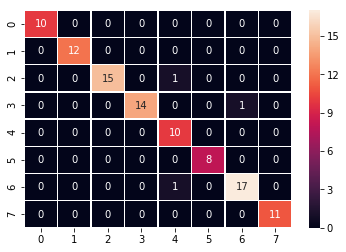

For IIIT-CFW dataset, best is Resnet + LR


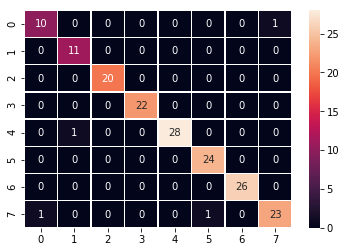

For Yale_faces dataset, best is Resnet + MLP


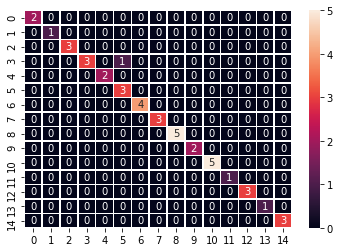

In [529]:
import seaborn as sns
# For each dataset print the confusion matrix for the best model
print("For IMFDB dataset, best is Resnet + LR")
ax = sns.heatmap(cm1, linewidth=0.5,annot=True)
plt.show()
# print(cm1)
print("For IIIT-CFW dataset, best is Resnet + LR")
ax = sns.heatmap(cm2, linewidth=0.5,annot=True)
plt.show()
# print(cm2)
print("For Yale_faces dataset, best is Resnet + MLP")
ax = sns.heatmap(cm3, linewidth=0.5,annot=True)
plt.show()
# print(cm3)


3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

For IMFDB
For IIIT-CFW
For Yale Faces


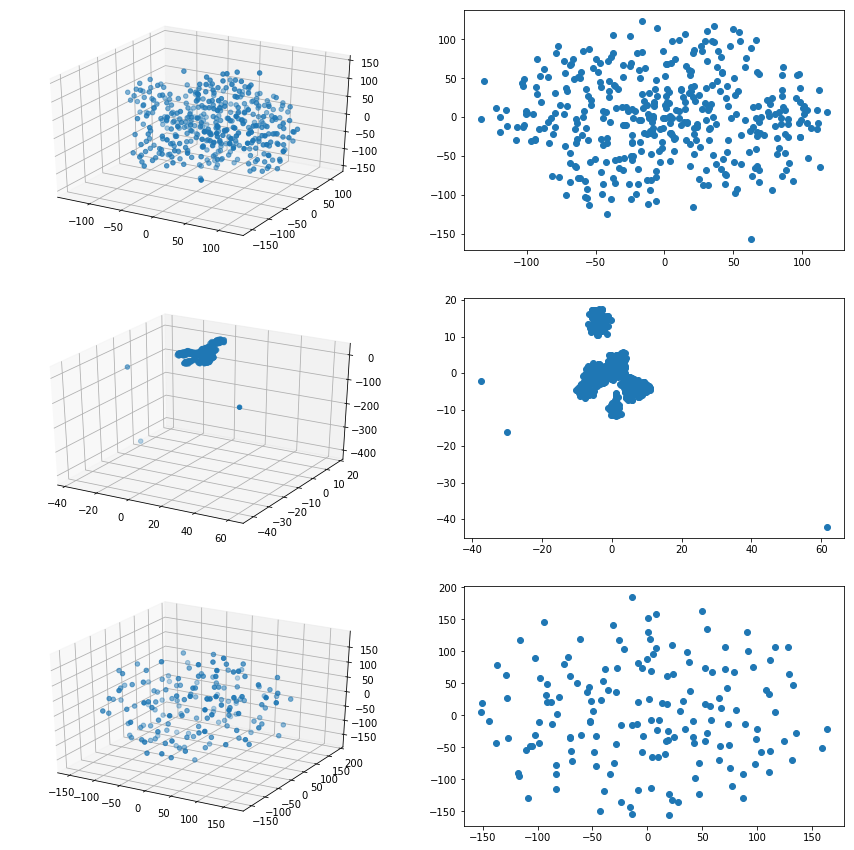

In [30]:
# Compute TSNE for different features and create a scatter plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

dirpath = './dataset/IMFDB/'
# X,y = load_data(dirpath)
# N,H,W = X.shape[0:3]
# C = 1 if opt['is_grayscale'] else X.shape[3]
# X = X.reshape((N,H*W*C))
X = get_resnet_features(dirpath) # feature 
k = 3 # Number of components in TSNE

# Compute
X_TSNE = TSNE(n_components=k).fit_transform(X)


# Plot the representation in 2d/3d

print("For IMFDB")
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(321, projection='3d')

ax.scatter(*zip(*X_TSNE))
# plt.show()
plt.subplot(322)
plt.scatter(*zip(*X_TSNE[:,:2]))
# plt.show()


print("For IIIT-CFW")
dirpath = './dataset/IIIT-CFW/'
# X,y = load_data(dirpath)
# N,H,W = X.shape[0:3]
# C = 1 if opt['is_grayscale'] else X.shape[3]
# X = X.reshape((N,H*W*C))
X = get_resnet_features(dirpath) # feature 
k = 3 # Number of components in TSNE

# Compute
X_TSNE = TSNE(n_components=k).fit_transform(X)


# Plot the representation in 2d/3d

# fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(323, projection='3d')

ax.scatter(*zip(*X_TSNE))
# plt.show()
plt.subplot(324)
plt.scatter(*zip(*X_TSNE[:,:2]))
# plt.show()


print("For Yale Faces")
dirpath = './dataset/Yale_face_database/'
# X,y = load_data(dirpath)
# N,H,W = X.shape[0:3]
# C = 1 if opt['is_grayscale'] else X.shape[3]
# X = X.reshape((N,H*W*C))
X = get_resnet_features(dirpath) # feature 
k = 3 # Number of components in TSNE

# Compute
X_TSNE = TSNE(n_components=k).fit_transform(X)


# Plot the representation in 2d/3d

# fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(325, projection='3d')

ax.scatter(*zip(*X_TSNE))
# plt.show()
plt.subplot(326)
plt.scatter(*zip(*X_TSNE[:,:2]))
plt.show()


4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [285]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
class FaceVerification():
    def __init__(self):
#         super.__init__()
        self.classifier = KNeighborsClassifier(n_neighbors=3)
        
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        
        pred= self.classifier.predict(X)
        if(pred == class_id):
            ver = True
        else:
            ver = False
            
        
        return ver
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.classifier.fit(X_train,y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        
        y_pred = self.classifier.predict(X_validate)
        cm = confusion_matrix(y_pred, y_validate)
        
        acc = accuracy_score(y_validate,y_pred)
        ver = np.count_nonzero(y_pred != y_validate)
        wrong_ans = ver/y_pred.shape[0]
        
        prec,recall,_,_ =  precision_recall_fscore_support(y_validate, y_pred, average='weighted')
    
        return acc, wrong_ans, prec

In [286]:
# Create a train and validation split and show your results 
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=27)

Dataset shape: (400, 32, 32, 3)


In [295]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision
df1 = pd.DataFrame(columns = ['Features','Dimension Space','Verification Error','Accuracy','Precision'])

# PCA
x_train_proj, pca= get_pca(x_train,150)
x_test_proj = pca.transform(x_test)
c = FaceVerification()
c.train(x_train_proj, y_train)
a,w,p = c.validate(x_test_proj, y_test)
# print(a,p)
df1.loc[1] = ['PCA',x_train_proj.shape[1],w,a,p]

#LDA
x_train_proj,lda = get_lda(x_train,y_train,150)
x_test_proj = lda.transform(x_test)
c = FaceVerification()
c.train(x_train_proj, y_train)
a,w,p = c.validate(x_test_proj, y_test)
df1.loc[2] = ['LDA',x_train_proj.shape[1],w,a,p]

#PCA + LDA
x_train_temp, pca= get_pca(x_train,150)
x_test_temp = pca.transform(x_test)
# print(x_train.shape)
x_train_proj, lda = get_lda(x_train_temp,y_train,100)
x_test_proj = lda.transform(x_test_temp)
# print(x_train_proj2.shape)
c = FaceVerification()
c.train(x_train_proj, y_train)
a,w,p = c.validate(x_test_proj, y_test)
df1.loc[3] = ['PCA+LDA',x_train_proj.shape[1],w,a,p]

#VGG
x_vgg = get_vgg_features(dirpath)
x_vgg_train, x_vgg_test, y_train, y_test = train_test_split(x_vgg,y, test_size= 0.25, random_state=27)
c = FaceVerification()
c.train(x_vgg_train,y_train)
a,w,p = c.validate(x_vgg_test, y_test)
df1.loc[4] = ['VGG',x_train_proj.shape[1],w,a,p]


#resnet
x_resnet = get_resnet_features(dirpath)
x_resnet_train, x_resnet_test, y_train, y_test = train_test_split(x_resnet,y, test_size= 0.25, random_state=27)
c = FaceVerification()
c.train(x_resnet_train,y_train)
a,w,p = c.validate(x_resnet_test, y_test)
df1.loc[5] = ['Resnet',x_train_proj.shape[1],w,a,p]

# print(df1)

/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3072, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_cl

In [297]:
print("IMFDB")
print(df1)
print("_______________________________________________________________________")
print("IIIT-CFW")
print(df2)
print("_______________________________________________________________________")
print("Yale faces")
print(df3)

IMFDB
  Features Dimension Space  Verification Error  Accuracy  Precision
1      PCA             150                0.44      0.56   0.663357
2      LDA               7                0.22      0.78   0.784402
3  PCA+LDA               7                0.20      0.80   0.804246
4      VGG               7                0.09      0.91   0.916008
5   Resnet               7                0.06      0.94   0.943643
_______________________________________________________________________
IIIT-CFW
  Features Dimension Space  Verification Error  Accuracy  Precision
1      PCA             150                0.44      0.56   0.663224
2      LDA               7                0.22      0.78   0.784402
3  PCA+LDA               7                0.20      0.80   0.812657
4      VGG               7                0.09      0.91   0.916008
5   Resnet               7                0.06      0.94   0.943643
_______________________________________________________________________
Yale faces
  Features Dim

### Extenstion / Application
    Create a system for any one of the following problems:

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

In [432]:
# Load data
cfw_dict_2 = {'Amitabhbachan': 0,
    'AamirKhan': 0,
    'DwayneJohnson': 0,
    'AishwaryaRai': 1,
    'BarackObama': 0,
    'NarendraModi': 0,
    'ManmohanSingh': 0,
    'VladimirPutin': 0}

imfdb_dict_2 = {'MadhuriDixit': 1,
     'Kajol': 1,
     'SharukhKhan': 0,
     'ShilpaShetty': 1,
     'AmitabhBachan': 0,
     'KatrinaKaif': 1,
     'AkshayKumar': 0,
     'Amir': 0}

def load_data_mine(dir_path1,dir_path2):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path1:
        label_dict = cfw_dict_2

    elif "IMFDB" in dir_path1:
        label_dict = imfdb_dict_2
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path1)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path1,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    
    if "CFW" in dir_path2:
        label_dict = cfw_dict_2

    elif "IMFDB" in dir_path2:
        label_dict = imfdb_dict_2
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path2)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path2,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list


dirpath1 = './dataset/IMFDB/'
dirpath2 = './dataset/IIIT-CFW'

# x_mine, y_mine = load_data_mine(dirpath1,dirpath2)
                           
x_mine_orig,y_mine_orig = load_data_mine(dirpath1,dirpath2)

Dataset shape: (1072, 32, 32, 3)


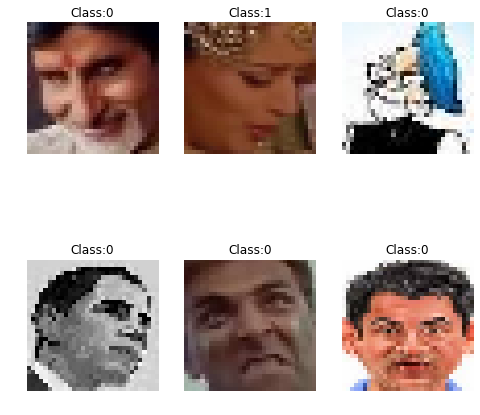

In [433]:
ind = np.random.randint(0,y_mine_orig.shape[0],6)
disply_images(x_mine_orig[ind,...],y_mine_orig[ind], row=2,col=3)

In [434]:
N,H,W = x_mine_orig.shape[0:3]
C = 1 if opt['is_grayscale'] else x_mine_orig.shape[3]
x_mine = x_mine_orig.reshape((N,H*W*C))
y_mine = y_mine_orig
x_mine_train, x_mine_test, y_mine_train, y_mine_test = train_test_split(x_mine,y_mine, test_size= 0.25, random_state=27)
# print(X[:,0].shape)
print(x_mine_train.shape,y_mine_train.shape,x_mine_test.shape,y_mine_test.shape)

(804, 3072) (804,) (268, 3072) (268,)


In [435]:
# Define your features
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    return X_k, pca

def get_lda(X,y,k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k, lda

def disply_images2(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(10,10))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        if(classes[i-1] == 1):
            fin = 0
        else:
            fin = 1
        plt.title("Class:{}".format(fin))
        plt.axis('off')
    plt.show()

In [436]:
# Create your classifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

class MyClassifier():
    def __init__(self):
        self.classifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
        
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.classifier.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return sklearn.metrics.confusion_matrix(y,pred)
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        a = self.classifier.fit(X_train,y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """

        # Create a confusion matrix
        y_pred = self.classifier.predict(X_validate)
#         cm = confusion_matrix(y_pred, y_validate)

        ind = np.where(y_pred!=y_validate)
        
        acc = accuracy_score(y_validate,y_pred)
        ver = np.count_nonzero(y_pred != y_validate)
        wrong_ans = ver/y_pred.shape[0]
        
        prec,recall,_,_ =  precision_recall_fscore_support(y_validate, y_pred, average='weighted')
    
        return acc, wrong_ans, prec,ind


# Validate your classifier

In [437]:
x_mine_train_temp, pca= get_pca(x_mine_train,123)
x_mine_test_temp = pca.transform(x_mine_test)
# print(x_train.shape)
x_mine_train_proj, lda = get_lda(x_mine_train_temp,y_mine_train,100)
x_mine_test_proj = lda.transform(x_mine_test_temp)
# print(x_train_proj2.shape)
c = MyClassifier()
c.train(x_mine_train_proj, y_mine_train)
a,w,p,ind = c.validate(x_mine_test_proj, y_mine_test)

/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(123, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/anushka/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Accuracy :  79.8507462686567 %


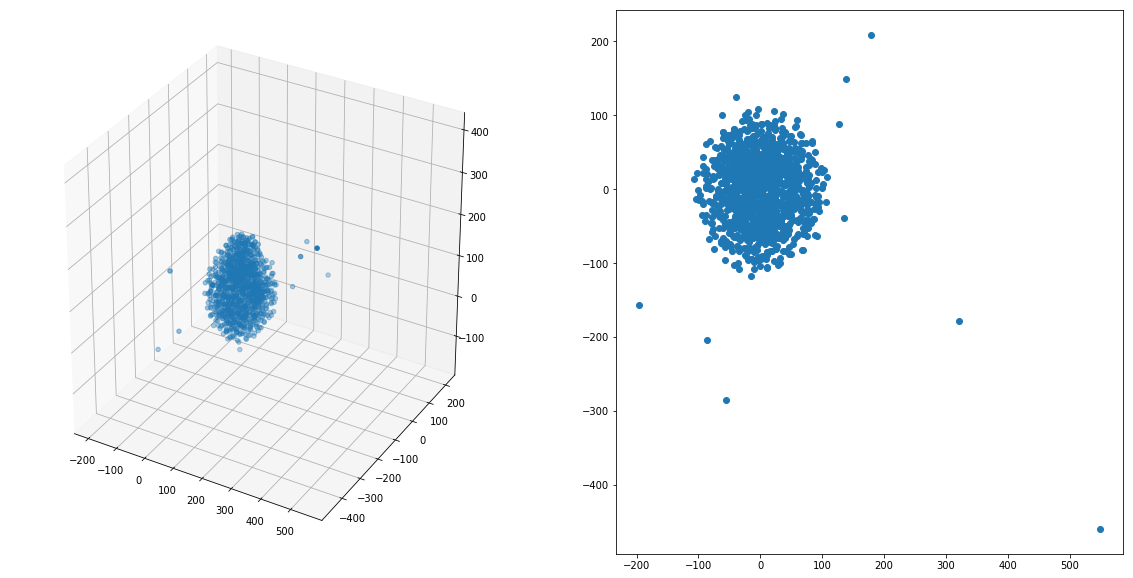

In [438]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc.  
print("Accuracy : ",a*100,"%")
# print(ind)
X_TSNE = TSNE(n_components=k).fit_transform(x_mine)


# Plot the representation in 2d/3d

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(*zip(*X_TSNE))
# plt.show()
plt.subplot(122)
plt.scatter(*zip(*X_TSNE[:,:2]))
plt.show()

54
Wrong predictions:


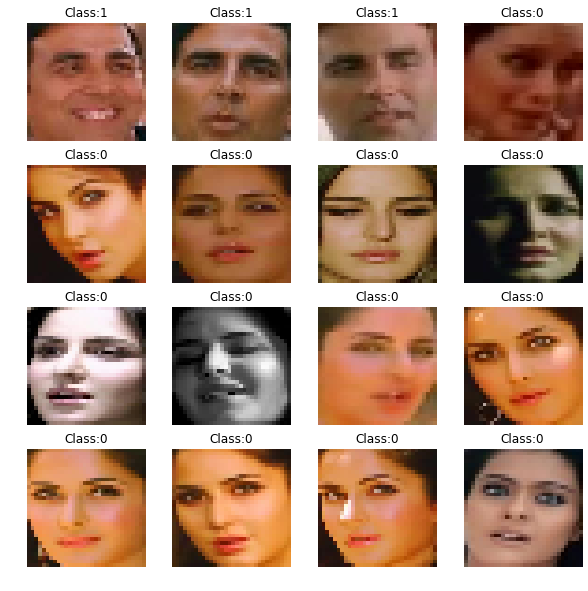

In [439]:
# Show quantitative results such as examples of correct prediction and wrong prediction
ind2 = np.random.randint(0,y_mine.shape[0],6)
# print(ind2.shape)
print(len(ind[0]))
indices = np.zeros((len(ind[0])),dtype=np.uint8)
# print(indices.shape)
for it in range(len(ind[0])):
#     print(ind[it])
    indices[it] = int(ind[0][it])

# print(indices)
indices2 = np.flip(indices,0)
# print(indices2)

print("Wrong predictions:")
disply_images2(x_mine_orig[indices2,...],y_mine_orig[indices2], row=4,col=4)

/home/anushka/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


Correct :


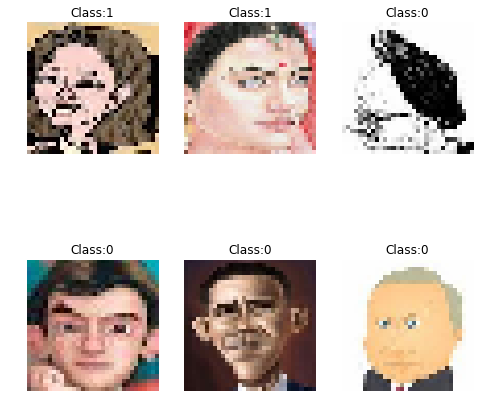

In [440]:
ind2 = np.random.randint(0,y_mine_orig.shape[0],6)
correct = np.where(ind2!=ind)

print("Correct :")
disply_images(x_mine_orig[ind2,...],y_mine_orig[ind2], row=2,col=3)